<img src='../img/EU-Copernicus-EUM_3Logos.png' alt='EU Copernicus Eumetsat logo' align='right' width='60%'></img>

<br>

# 1.3 Sentinel-5P TROPOMI - Ultraviolet Aerosol Index (UVAI) - Level 2

### About

The following example introduces you to the Aerosol Index (AI) product from the Sentinel-5P TROPOMI instrument. The Aerosol Index (AI) is a qualitative index indicating the presence of elevated layers of aerosols with significant absorption. The main aerosol types that cause signals detected in the AI are `desert dust`, `biomass burning` and `volcanic ash plumes`. An advantage of the AI is that it can be derived for clear as well as (partly) cloudy ground pixels.


The Copernicus Sentinel-5 Precursor mission is the first Copernicus mission dedicated to atmospheric monitoring. The main objective of the Sentinel-5P mission is to perform atmospheric measurements with high spatio-temporal resolution, to be used for air quality, ozone & UV radiation, and climate monitoring and forecasting.

Sentinel-5P carries the `TROPOMI` instrument, which is a spectrometer in the UV-VIS-NIR-SWIR spectral range. `TROPOMI` provides measurements on:
* `Ozone`
* `NO`<sub>`2`</sub>
* `SO`<sub>`2`</sub>
* `Formaldehyde`
* `Aerosol`
* `Carbonmonoxide`
* `Methane`
* `Clouds`

Read more information about Sentinel-5P [here](https://dataspace.copernicus.eu/explore-data/data-collections/sentinel-data/sentinel-5p).

### Basic Facts

> **Spatial resolution**: `Up to 5.5 km x 3.5 km` (5.5 km in the satellite flight direction and 3.5 km in the perpendicular direction at nadir) <br>
> **Spatial coverage**: `Global` <br>
> **Revisit time**:  `less than one day` <br>
> **Data availability**: `since April 2018`


### How to access the data

Sentinel-5P data are disseminated in the `netCDF` format and can be downloaded as a zipped archive via the [Copernicus Data Space](https://dataspace.copernicus.eu/):
* **Step 1**: [Register](https://identity.dataspace.copernicus.eu/auth/realms/CDSE/login-actions/registration?client_id=account-console&tab_id=v_DHRD96Two) and create an account.
* **Step 2**: Go to the [Sentinel-5P data collection](https://dataspace.copernicus.eu/explore-data/data-collections/sentinel-data/sentinel-5p) and view Level-2 Aerosol Index NTC data in the [Browser](https://eur02.safelinks.protection.outlook.com/?url=https%3A%2F%2Fsentinelshare.page.link%2FDmLr&data=05%7C01%7C%7Cd36929ab445b4c210c4008db4fc55ec7%7C9e2777ed82374ab992782c144d6f6da3%7C0%7C1%7C638191481363675599%7CUnknown%7CTWFpbGZsb3d8eyJWIjoiMC4wLjAwMDAiLCJQIjoiV2luMzIiLCJBTiI6Ik1haWwiLCJXVCI6Mn0%3D%7C3000%7C%7C%7C&sdata=oDmtdAUHyNG0rViIcg7wQoxUlKqDj5ketUwh4r9u5a4%3D&reserved=0).
* **Step 3**: Go to SEARCH and search for Sentinel-5P Level-2 AER-AI data and select a date range and region of interest.
* **Step 4**: Select a file and download it.

### Module outline
* [1 - Load and browse 'Sentinel-5P TROPOMI Aerosol Index Level 2' data](#load_browse_s5p)
* [2 - Retrieve the variable 'Aerosol index from 354 and 388 nm' as xarray.DataArray](#data_retrieve_s5p)
* [3 - Visualize 'Sentinel-5P TROPOMI aerosol index from 388 and 354 nm'](#visualize_s5p)
* [4 - Create a geographical subset](#subset_s5p)

<hr>

#### Load required libraries

In [ ]:
import sys
!{sys.executable} -m pip install cartopy netCDF4 h5netcdf==1.3.0 satpy==0.51.0 pyhdf h5py python-geotiepoints

In [9]:
import xarray as xr

import os
os.environ['PROJ_LIB'] = '/opt/conda/share/proj'

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.cm import get_cmap
from matplotlib.axes import Axes

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
warnings.simplefilter(action = "ignore", category = UserWarning)

#### Load helper functions

In [10]:
if os.path.exists("functions.ipynb"):
    %run functions.ipynb
elif os.path.exists("../functions.ipynb"):
    %run ../functions.ipynb
else:
    print("Helper functions notebook not found in any specified path. Downloading from Gitlab.")    
    !wget https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere/-/raw/master/functions.ipynb
    %run functions.ipynb

In [11]:
if os.path.exists("bucket_functions.ipynb"):
    %run bucket_functions.ipynb
elif os.path.exists("../bucket_functions.ipynb"):
    %run ../bucket_functions.ipynb
else:
    print("Helper functions notebook not found in any specified path. Downloading from Gitlab.")    
    !wget https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere/-/raw/master/90_workshops/202410_wmo_school/bucket_functions.ipynb
    %run bucket_functions.ipynb

In [12]:
base_url = 'https://s3.waw3-2.cloudferro.com/swift/v1/wmo/'
all_paths_list = list_data_on_bucket(base_url)

all_directories_list = [os.path.dirname(path) for path in all_paths_list if path.count('/') <= 4]
# Take unique directories
all_directories_list = list(np.unique(all_directories_list))
all_directories_list

Status ok



['eodata',
 'eodata/fci',
 'eodata/gome2',
 'eodata/gome2/aai',
 'eodata/gome2/hcho',
 'eodata/gome2/hcho/daily',
 'eodata/gome2/no2',
 'eodata/gome2/no2/daily',
 'eodata/iasi',
 'eodata/iasi/co',
 'eodata/iasi/nh3',
 'eodata/meteosat',
 'eodata/meteosat/2020',
 'eodata/meteosat/2024',
 'eodata/modis',
 'eodata/modis/10km',
 'eodata/modis/level_1b',
 'eodata/monarch',
 'eodata/pmap',
 'eodata/s3',
 'eodata/s3/aod',
 'eodata/s3/aod/S3A_SL_2_AOD____20240821T082340_20240821T082839_20240821T101507_0299_116_078______MAR_O_NR_003.SEN3',
 'eodata/s3/aod/S3A_SL_2_AOD____20240825T081954_20240825T082453_20240825T101112_0299_116_135______MAR_O_NR_003.SEN3',
 'eodata/s3/aod/S3A_SL_2_AOD____20240827T090833_20240827T091332_20240827T105910_0299_116_164______MAR_O_NR_003.SEN3',
 'eodata/s3/aod/S3B_SL_2_AOD____20240822T071826_20240822T072325_20240822T091012_0299_096_334______MAR_O_NR_003.SEN3',
 'eodata/s3/aod/S3B_SL_2_AOD____20240823T083336_20240823T083833_20240823T102404_0299_096_349______MAR_O_NR_00

#### Set geographical extent

In [13]:
latmin = 0
latmax = 40
lonmin = -50
lonmax = 20

<hr>

### <a id='load_browse_s5p'></a>1. Load and browse Sentinel-5P TROPOMI Aerosol Index Level 2 data

A Sentinel-5P TROPOMI Aerosol Index Level 2 file is organised in two groups: `PRODUCT` and `METADATA`. The `PRODUCT` group stores the main data fields of the product, including `latitude`, `longitude` and the variable itself. The `METADATA` group provides additional metadata items.

Sentinel-5P TROPOMI variables have the following dimensions:
* `scanline`: the number of measurements in the granule / along-track dimension index
* `ground_pixel`: the number of spectra in a measurement / across-track dimension index
* `time`: time reference for the data
* `corner`: pixel corner index

Sentinel-5P TROPOMI data is disseminated in `netCDF`. You can load a `netCDF` file with the `open_dataset()` function of the xarray library. In order to load the variable as part of a Sentinel-5P data files, you have to specify the following keyword arguments: 
- `group='PRODUCT'`: to load the `PRODUCT` group

Let us load a Sentinel-5P TROPOMI data file as `xarray.Dataset` from 19 June 2020 at 13:09 UTC and inspect the data structure:

In [14]:
data_path = base_url + 'eodata/s5p/aer_ai/S5P_OFFL_L2__AER_AI_20200619T130926_20200619T145056_13906_01_010302_20200621T025709/S5P_OFFL_L2__AER_AI_20200619T130926_20200619T145056_13906_01_010302_20200621T025709.nc'
file = open_data_from_bucket(data_path, group='PRODUCT')

File opened: https://s3.waw3-2.cloudferro.com/swift/v1/wmo/eodata/s5p/aer_ai/S5P_OFFL_L2__AER_AI_20200619T130926_20200619T145056_13906_01_010302_20200621T025709/S5P_OFFL_L2__AER_AI_20200619T130926_20200619T145056_13906_01_010302_20200621T025709.nc


You see that the loaded data object contains of four dimensions and seven data variables:
* **Dimensions**:
  * `scanline` 
  * `ground_pixel`
  * `time`
  * `corner`


* **Data variables**:
  * `delta_time`: the offset of individual measurements within the granule, given in milliseconds
  * `time_utc`: valid time stamp of the data
  * `qa_value`: quality descriptor, varying between 0 (nodata) and 1 (full quality data).
  * `aerosol_index_354_388`: Aerosol index from 354 and 388 nm
  * `aerosol_index_340_380`: Aerosol index from 340 and 380 nm
  * `aerosol_index_354_388_precision`: Precision of aerosol index from 354 and 388 nm
  * `aerosol_index_340_380_precision`: Precision of aerosol index from 340 and 380 nm

<br>

### <a id='data_retrieve_s5p'></a>2. Retrieve the variable Aerosol index from 354 and 388 nm as xarray.DataArray

You can specify one variable of interest by putting the name of the variable into square brackets `[]` and get more detailed information about the variable. E.g. `aerosol_index_354_388` is the 'Aerosol index from 354 and 388 nm' and has three dimensions, `time`, `scanline` and `ground_pixel` respectively.

In [15]:
ai = file['aerosol_index_354_388']
ai

<xarray.DataArray 'aerosol_index_354_388' (time: 1, scanline: 4172,
                                           ground_pixel: 450)> Size: 8MB
[1877400 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 33kB 0.0 1.0 2.0 ... 4.17e+03 4.171e+03
  * ground_pixel  (ground_pixel) float64 4kB 0.0 1.0 2.0 ... 447.0 448.0 449.0
  * time          (time) datetime64[ns] 8B 2020-06-19
    latitude      (time, scanline, ground_pixel) float32 8MB ...
    longitude     (time, scanline, ground_pixel) float32 8MB ...
Attributes:
    units:                   1
    proposed_standard_name:  ultraviolet_aerosol_index
    comment:                 Aerosol index from 388 and 354 nm
    long_name:               Aerosol index from 388 and 354 nm
    radiation_wavelength:    [354. 388.]
    ancillary_variables:     aerosol_index_354_388_precision

You can retrieve the array values of the variable with squared brackets: `[:,:,:]`. One single time step can be selected by specifying one value of the time dimension, e.g. `[0,:,:]`.

In [16]:
ai_0602 = ai[0,:,:]
ai_0602

<xarray.DataArray 'aerosol_index_354_388' (scanline: 4172, ground_pixel: 450)> Size: 8MB
[1877400 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 33kB 0.0 1.0 2.0 ... 4.17e+03 4.171e+03
  * ground_pixel  (ground_pixel) float64 4kB 0.0 1.0 2.0 ... 447.0 448.0 449.0
    time          datetime64[ns] 8B 2020-06-19
    latitude      (scanline, ground_pixel) float32 8MB ...
    longitude     (scanline, ground_pixel) float32 8MB ...
Attributes:
    units:                   1
    proposed_standard_name:  ultraviolet_aerosol_index
    comment:                 Aerosol index from 388 and 354 nm
    long_name:               Aerosol index from 388 and 354 nm
    radiation_wavelength:    [354. 388.]
    ancillary_variables:     aerosol_index_354_388_precision

Additionally, you can save the attributes `units` and `longname`, which you can make use of when visualizing the data.

In [17]:
longname = ai_0602.long_name
units = ai_0602.units

longname, units

('Aerosol index from 388 and 354 nm', '1')

### <a id='visualize_s5p'></a>3. Visualize Sentinel-5P TROPOMI aerosol index from 388 and 354 nm

The next step is to visualize the dataset. You can use the function [visualize_pcolormesh](../../functions.ipynb#visualize_pcolormesh), which makes use of matploblib's function `pcolormesh` and the [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) library.

With `?visualize_pcolormesh` you can open the function's docstring to see what keyword arguments are needed to prepare your plot.

In [18]:
?visualize_pcolormesh

Signature:
visualize_pcolormesh(
    data_array,
    longitude,
    latitude,
    projection,
    color_scale,
    unit,
    long_name,
    vmin,
    vmax,
    set_global=True,
    lonmin=-180,
    lonmax=180,
    latmin=-90,
    latmax=90,
)
Docstring:
Visualizes a xarray.DataArray with matplotlib's pcolormesh function.

Parameters:
    data_array(xarray.DataArray): xarray.DataArray holding the data values
    longitude(xarray.DataArray): xarray.DataArray holding the longitude values
    latitude(xarray.DataArray): xarray.DataArray holding the latitude values
    projection(str): a projection provided by the cartopy library, e.g. ccrs.PlateCarree()
    color_scale(str): string taken from matplotlib's color ramp reference
    unit(str): the unit of the parameter, taken from the NetCDF file if possible
    long_name(str): long name of the parameter, taken from the NetCDF file if possible
    vmin(int): minimum number on visualisation legend
    vmax(int): maximum number on visualisation

You can make use of the variables we have defined above:
- `units`
- `long_name`
- `latitude`
- `longitude`

Additionally, you can specify the color scale and minimum and maxium data values.

(<Figure size 2000x1000 with 2 Axes>,
 <GeoAxes: title={'center': 'Aerosol index from 388 and 354 nm 2020-06-19T00:00:00.000000000'}>)

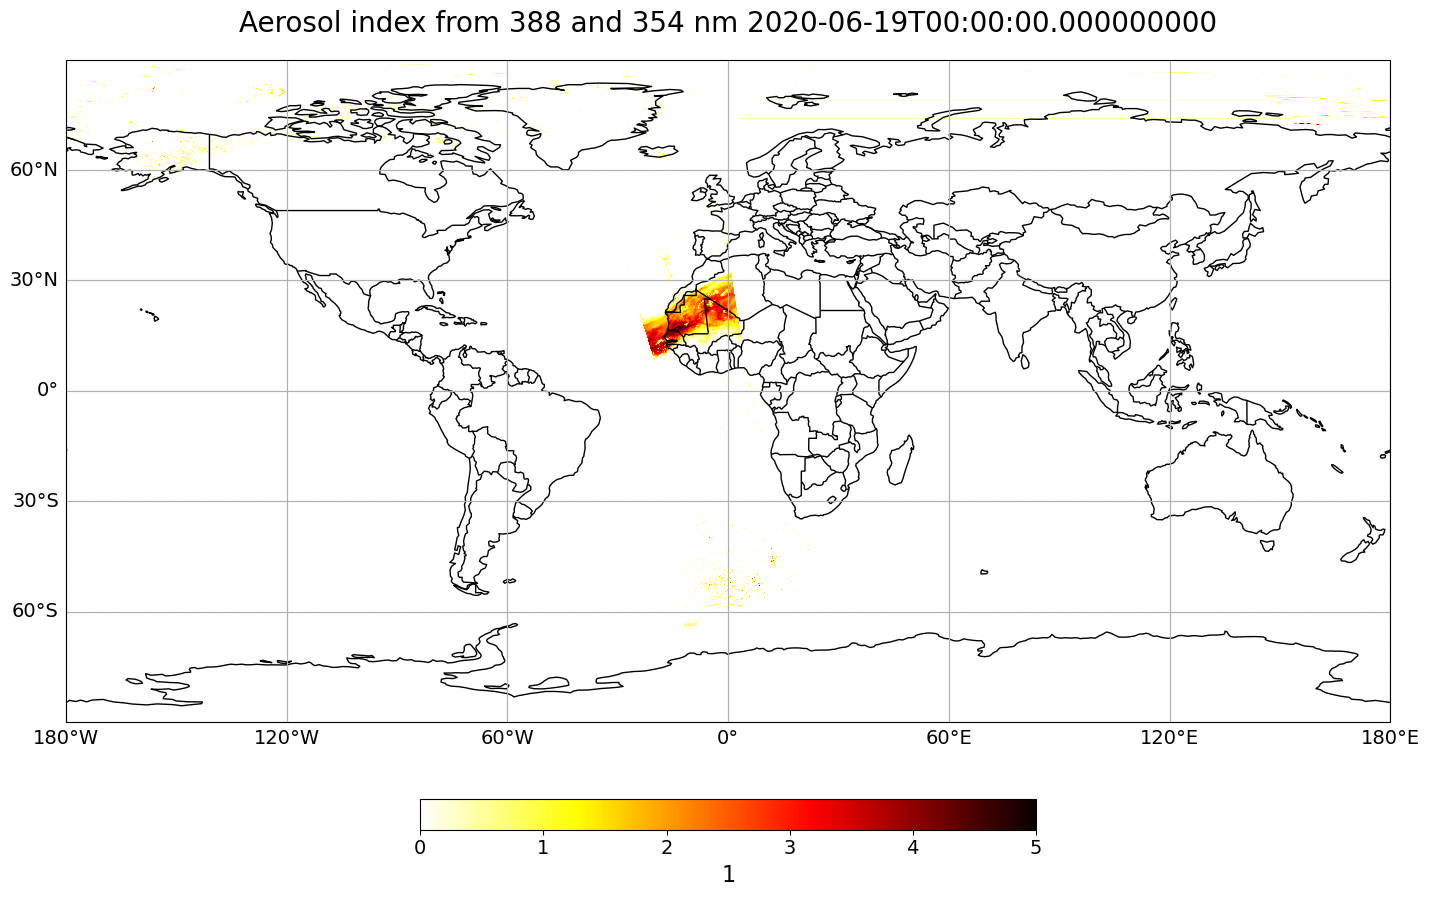

In [19]:
visualize_pcolormesh(data_array=ai_0602,
                     longitude=ai_0602.longitude,
                     latitude=ai_0602.latitude,
                     projection=ccrs.PlateCarree(),
                     color_scale='hot_r',
                     unit=units,
                     long_name=longname + ' ' + str(ai_0602.time.data),
                     vmin=0, 
                     vmax=5)

<br>

### <a id='subset_s5p'></a>4. Create a geographical subset

The map above shows the aerosol index of one footprint along the entire latitude range. Let us create a geographical subset for Europe, in order to better analyse the Saharan dust event which occured in February 2021 over Europe.

For geographical subsetting, you can use the function [generate_geographical_subset](../../functions.ipynb#generate_geographical_subset). You can use `?generate_geographical_subset` to open the docstring in order to see the function's keyword arguments.

In [20]:
?generate_geographical_subset

Signature:
generate_geographical_subset(
    xarray,
    latmin,
    latmax,
    lonmin,
    lonmax,
    reassign=False,
)
Docstring:
Generates a geographical subset of a xarray.DataArray and if kwarg reassign=True, shifts the longitude grid 
from a 0-360 to a -180 to 180 deg grid.

Parameters:
    xarray(xarray.DataArray): a xarray DataArray with latitude and longitude coordinates
    latmin, latmax, lonmin, lonmax(int): lat/lon boundaries of the geographical subset
    reassign(boolean): default is False
    
Returns:
    Geographical subset of a xarray.DataArray.
File:      /tmp/ipykernel_12190/3979307327.py
Type:      function

Define the bounding box information

In [21]:
latmin = 0.
latmax = 30.
lonmin = -30.
lonmax = 0

<br>

Now, let us apply the function [generate_geographical_subset](../../functions.ipynb#generate_geographcial_subset) to subset the `ai_0602` xarray.DataArray. Let us call the new `xarray.DataArray` `ai_0602_subset`.

In [22]:
ai_0602_subset = generate_geographical_subset(xarray=ai_0602, 
                                             latmin=latmin, 
                                             latmax=latmax, 
                                             lonmin=lonmin, 
                                             lonmax=lonmax)
ai_0602_subset

<xarray.DataArray 'aerosol_index_354_388' (scanline: 726, ground_pixel: 436)> Size: 1MB
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [-1.6854701, -1.6978798, -1.4786767, ...,        nan,        nan,
               nan],
       [-1.8406544, -1.740484 ,        nan, ...,        nan,        nan,
               nan],
       [-1.7803227,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * scanline      (scanline) float64 6kB 1.512e+03 1.513e+03 ... 2.237e+03
  * ground_pixel  (ground_pixel) float64 3kB 0.0 1.0 2.0 ... 433.0 434.0 435.0
    time          datetime64[ns] 8B 2020-06-19
    latitude      (scanline, ground_pixel) float32 1MB -4.712 -4.682 ... 35.73
    longitude     (scanline, ground_pixel) float32 1MB -17.13 -17.05 ... -0.8275
Attributes:
    units:                   1
    proposed_standard_name:  ultraviolet_aerosol_index
    comment:                 Aerosol index from 388 and 354 nm
    long_name:               Aerosol index from 388 and 354 nm
    radiation_wavelength:    [354. 388.]
    ancillary_variables:     aerosol_index_354_388_precision

<br>

Let us visualize the subsetted `xarray.DataArray` again. This time, you set the `set_global` kwarg to `False` and you specify the longitude and latitude bounds specified above.

Additionally, in order to have the time information as part of the title, we add the string of the datetime information to the `longname` variable: `longname + ' ' + str(ai_0602.time.data)`.

(<Figure size 2000x1000 with 2 Axes>,
 <GeoAxes: title={'center': 'Aerosol index from 388 and 354 nm 2020-06-19T00:00:00.000000000'}>)

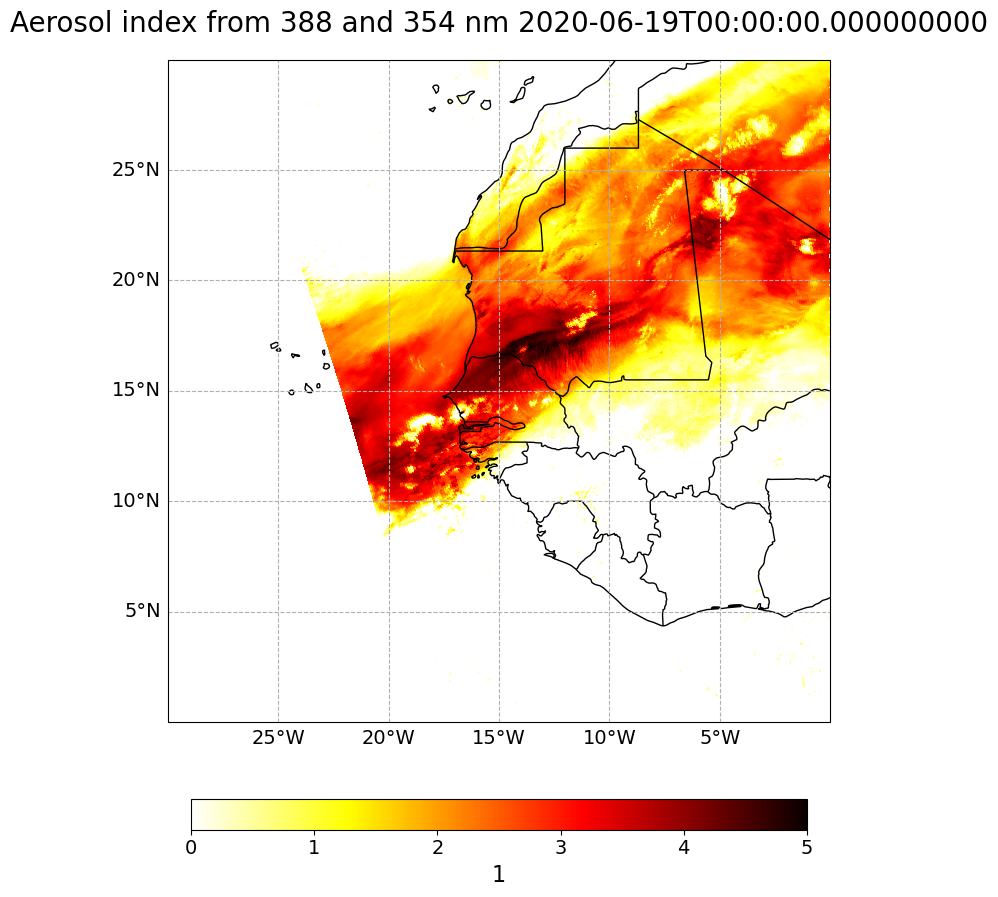

In [23]:
visualize_pcolormesh(data_array=ai_0602_subset,
                     longitude=ai_0602_subset.longitude,
                     latitude=ai_0602_subset.latitude,
                     projection=ccrs.PlateCarree(),
                     color_scale='hot_r',
                     unit=units,
                     long_name=longname + ' ' + str(ai_0602_subset.time.data),
                     vmin=0, 
                     vmax=5,
                     lonmin=lonmin,
                     lonmax=lonmax,
                     latmin=latmin,
                     latmax=latmax,
                     set_global=False)

<hr>

### References
* Copernicus Sentinel-5P (processed by ESA), 2021, TROPOMI Level 2 Ultraviolet Aerosol Index products. Version 02. European Space Agency. https://doi.org/10.5270/S5P-3dgz66p

* This notebook was adapted from: https://dustbook.ltpy.adamplatform.eu/docs/sentinel5p_ai.html

<hr>

<img src='../img/copernicus_logo.png' alt='Logo EU Copernicus' align='right' width='20%'><br><br><br><br>
<p style="text-align:right;">This project is licensed under <a href="../../LICENSE">GNU General Public License v3.0 only</a> and is developed under a Copernicus contract.

<p style="text-align:right;"> <a href='https://training.eumetsat.int'>EUMETSAT Training</a> | <a href='mailto:training@eumetsat.int'>Contact the training team</a></p>